In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
file_to_load = 'clean_sharks.csv'
shark_df = pd.read_csv(file_to_load)
shark_df.head()

,Attack Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
0,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,NaN
2,2018-06-09,2018.0,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,NaN
3,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,2 m shark
4,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"


In [3]:
Species = shark_df["Species "].value_counts().to_frame()
pd.set_option("max_rows", None)
Species


,Species
White shark,110
Shark involvement not confirmed,67
Shark involvement prior to death was not confirmed,54
Tiger shark,46
Invalid,41
4' shark,35
Bull shark,35
6' shark,26
4' to 5' shark,22
No shark involvement,21


In [4]:
# White, Tiger, Bull, Blacktip, bronze whaler, wobbegong, grey reef, hammerhead, spinner, mako, sand, nurse, lemon, 
# 'involvement' > involvement suspected but not confirmed

In [5]:
dubious = shark_df[shark_df['Species '].str.contains('involvement', flags=re.IGNORECASE, na=False)]
shark_df.loc[shark_df['Species '].str.contains('involvement', na =False,case=False), 'Species '] = 'Shark Involvement Questionable'

shark_df["Species "] = shark_df.loc[:,"Species "].replace(
    {"Questionable incident": "Shark Involvement Questionable",
     "Questionable Incident": "Shark Involvement Questionable",
     "Questionable": "Shark Involvement Questionable",
    " ": "Unidentified Species",
    "Seven-gill shark": "Sevengill Shark",
    "7-gill shark": "Sevengill Shark"})

unidentified = shark_df[shark_df['Species '].str.contains('unidentified', na=False)]
shark_df.loc[shark_df['Species '].str.contains('unidentified', na =False,case=False), 'Species '] = 'Unidentified Species'

invalid = shark_df[shark_df['Species '].str.contains('invalid', na=False)]
shark_df.loc[shark_df['Species '].str.contains('invalid', na =False,case=False), 'Species '] = 'Invalid Report'

tiger_king = shark_df[shark_df['Species '].str.contains('tiger', na=False)]
shark_df.loc[shark_df['Species '].str.contains('tiger', na =False,case=False), 'Species '] = 'Tiger Shark'

white = shark_df[shark_df['Species '].str.contains('white', na=False)]
shark_df.loc[shark_df['Species '].str.contains('white', na =False,case=False), 'Species '] = 'White Shark'

bull = shark_df[shark_df['Species '].str.contains('bull', na=False)]
shark_df.loc[shark_df['Species '].str.contains('bull', na =False,case=False), 'Species '] = 'Bull Shark'

blacktip = shark_df[shark_df['Species '].str.contains('blacktip', na=False)]
shark_df.loc[shark_df['Species '].str.contains('blacktip', na =False,case=False), 'Species '] = 'Blacktip Shark'

whaler = shark_df[shark_df['Species '].str.contains('bronze whaler', na=False)]
shark_df.loc[shark_df['Species '].str.contains('bronze whaler', na =False,case=False), 'Species '] = 'Bronze Whaler Shark'

wobbegong = shark_df[shark_df['Species '].str.contains('wobbegong', na=False)]
shark_df.loc[shark_df['Species '].str.contains('wobbegong', na =False,case=False), 'Species '] = 'Wobbegong Shark'

reef = shark_df[shark_df['Species '].str.contains('grey reef', na=False)]
shark_df.loc[shark_df['Species '].str.contains('grey reef', na =False,case=False), 'Species '] = 'Grey Reef Shark'

hammerhead = shark_df[shark_df['Species '].str.contains('hammerhead', na=False)]
shark_df.loc[shark_df['Species '].str.contains('hammerhead', na =False,case=False), 'Species '] = 'Hammerhead Shark'

spinner = shark_df[shark_df['Species '].str.contains('spinner', na=False)]
shark_df.loc[shark_df['Species '].str.contains('spinner', na =False,case=False), 'Species '] = 'Spinner Shark'

wobbegong = shark_df[shark_df['Species '].str.contains('mako', na=False)]
shark_df.loc[shark_df['Species '].str.contains('mako', na =False,case=False), 'Species '] = 'Mako Shark'

sand = shark_df[shark_df['Species '].str.contains('sand', na=False)]
shark_df.loc[shark_df['Species '].str.contains('sand', na =False,case=False), 'Species '] = 'Sand Shark'

nurse = shark_df[shark_df['Species '].str.contains('nurse', na=False)]
shark_df.loc[shark_df['Species '].str.contains('nurse', na =False,case=False), 'Species '] = 'Nurse Shark'

lemon = shark_df[shark_df['Species '].str.contains('lemon', na=False)]
shark_df.loc[shark_df['Species '].str.contains('lemon', na =False,case=False), 'Species '] = 'Lemon Shark'

carribbean = shark_df[shark_df['Species '].str.contains('caribbean', na=False)]
shark_df.loc[shark_df['Species '].str.contains('caribbean', na =False,case=False), 'Species '] = 'Caribbean Reef Shark'

galapagos = shark_df[shark_df['Species '].str.contains('galapagos', na=False)]
shark_df.loc[shark_df['Species '].str.contains('galapagos', na =False,case=False), 'Species '] = 'Galapagos Shark'

ragged = shark_df[shark_df['Species '].str.contains('raggedtooth', na=False)]
shark_df.loc[shark_df['Species '].str.contains('raggedtooth', na =False,case=False), 'Species '] = 'Raggedtooth Shark'

seven = shark_df[shark_df['Species '].str.contains('sevengill', na=False)]
shark_df.loc[shark_df['Species '].str.contains('sevengill', na =False,case=False), 'Species '] = 'Sevengill Shark'

small = shark_df[shark_df['Species '].str.contains('small', na=False)]
shark_df.loc[shark_df['Species '].str.contains('small', na =False,case=False), 'Species '] = 'A "Small" Shark'

blue = shark_df[shark_df['Species '].str.contains('blue', na=False)]
shark_df.loc[shark_df['Species '].str.contains('blue', na =False,case=False), 'Species '] = 'Blue Shark'

angel = shark_df[shark_df['Species '].str.contains('angel', na=False)]
shark_df.loc[shark_df['Species '].str.contains('angel', na =False,case=False), 'Species '] = 'Angel Shark'

zambesi = shark_df[shark_df['Species '].str.contains('zambesi', na=False)]
shark_df.loc[shark_df['Species '].str.contains('zambesi', na =False,case=False), 'Species '] = 'Zambesi Shark'

copper = shark_df[shark_df['Species '].str.contains('copper', na=False)]
shark_df.loc[shark_df['Species '].str.contains('copper', na =False,case=False), 'Species '] = 'Copper Shark'

reef = shark_df[shark_df['Species '].str.contains('reef', na=False)]
shark_df.loc[shark_df['Species '].str.contains('reef', na =False,case=False), 'Species '] = 'Reef Shark'

grey = shark_df[shark_df['Species '].str.contains('grey', na=False)]
shark_df.loc[shark_df['Species '].str.contains('grey', na =False,case=False), 'Species '] = 'Grey Shark'

porbeagle = shark_df[shark_df['Species '].str.contains('porbeagle', na=False)]
shark_df.loc[shark_df['Species '].str.contains('porbeagle', na =False,case=False), 'Species '] = 'Porbeagle Shark'

goblin = shark_df[shark_df['Species '].str.contains('goblin', na=False)]
shark_df.loc[shark_df['Species '].str.contains('goblin', na =False,case=False), 'Species '] = 'Goblin Shark'

salmon = shark_df[shark_df['Species '].str.contains('salmon', na=False)]
shark_df.loc[shark_df['Species '].str.contains('salmon', na =False,case=False), 'Species '] = 'Salmon Shark'

hoax = shark_df[shark_df['Species '].str.contains('hoax', na=False)]
shark_df.loc[shark_df['Species '].str.contains('hoax', na =False,case=False), 'Species '] = 'Hoax'

size = shark_df[shark_df['Species '].str.contains("'", na=False)]
shark_df.loc[shark_df['Species '].str.contains("'", na =False,case=False), 'Species '] = 'Only Described by Size'

size = shark_df[shark_df['Species '].str.contains(" m ", na=False)]
shark_df.loc[shark_df['Species '].str.contains(" m ", na =False,case=False), 'Species '] = 'Only Described by Size'





# species_df = pd.DataFrame(shark_df["Species "].value_counts())
# clean_species_df = species_df[species_df['Species ']>3]
# pd.set_option('max_rows', None)

# clean_species_df = clean_species_df.drop([0, 3, 8, 9])
# clean_species_df.drop(['level_0'], axis=1)
# clean_species_df.reset_index()



species_df = pd.DataFrame(shark_df["Species "].value_counts().reset_index())
clean_species_df = species_df[species_df['Species ']>3]
pd.set_option('max_rows', None)

clean_species_df = clean_species_df.drop([0, 3, 8, 9])
clean_species_df.reset_index().drop(['level_0'], axis=1)

clean_species_df2 = clean_species_df.set_index('index')
clean_species_df2 = clean_species_df2.drop(['A "Small" Shark', 'Unidentified Species'])
clean_species_df2

,Species
index,
White Shark,456
Tiger Shark,199
Bull Shark,146
Blacktip Shark,88
Bronze Whaler Shark,46
Reef Shark,42
Raggedtooth Shark,36
Mako Shark,33
Wobbegong Shark,27


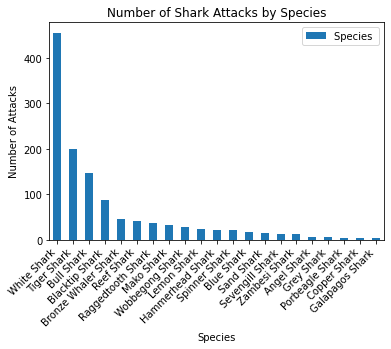

In [6]:
clean_species_df2.plot.bar()
plt.xticks(rotation = 45, ha="right")
plt.title("Number of Shark Attacks by Species")
plt.ylabel("Number of Attacks")
plt.xlabel("Species")
plt.savefig('Shark_species.pdf',bbox_inches='tight')
plt.show()

Fatal (Y/N),N,Y
Species,,
2m shark,3.0,NaN
"A ""Small"" Shark",39.0,NaN
Angel Shark,5.0,NaN
Blacktip Shark,88.0,NaN
Blue Shark,14.0,NaN
Bronze Whaler Shark,44.0,NaN
Bull Shark,124.0,22.0
Copper Shark,4.0,NaN
Galapagos Shark,4.0,NaN


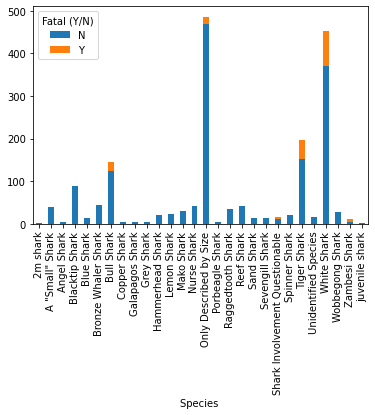

In [7]:
fatal_sharks = shark_df[['Species ', 'Fatal (Y/N)']].copy()
fatal_sharks

fatal_df = pd.DataFrame(fatal_sharks.value_counts())

fatal_df.reset_index()
fatal_df.rename(columns={"0":"Count"}, inplace=True)
counts = fatal_sharks.value_counts()

new_df = counts.to_frame().reset_index()

new_df = new_df.rename(columns={0:"Count"})

new_df = new_df[new_df['Count']>2]
new_df = new_df.pivot(index='Species ', columns='Fatal (Y/N)', values='Count')
new_df.plot.bar(stacked=True)
# df.rename(columns={"OldName":"NewName"})
# clean_fatality = fatal_df[fatal_df['0']>2]
# clean_species_df = species_df[species_df['Species ']>3]
# pd.set_option('max_rows', None)

# bar_plot = fatal_sharks[['Species ', 'Fatal (Y/N)']]
# bar_plot_count = bar_plot.groupby("Species ").count()
# bar_plot_count.plot.bar()
# plt.title("Number of Mice per Treatment Regimen")
# plt.ylabel("Number of Mice")
# plt.xticks(rotation = 45, ha="right")

new_df

In [8]:
new_df = new_df.drop(['2m shark', 'A "Small" Shark', 'Only Described by Size', 'Shark Involvement Questionable',
                      'Unidentified Species', 'juvenile shark'])


<AxesSubplot:xlabel='Species '>

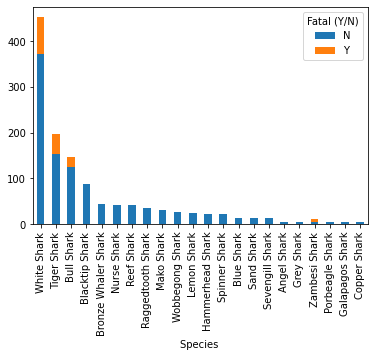

In [9]:
new_df = new_df.sort_values(by='N', ascending=False)
new_df.plot.bar(stacked=True)

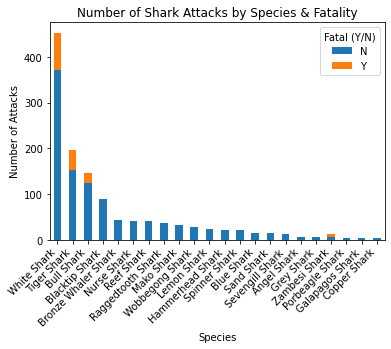

In [10]:
new_df.plot.bar(stacked=True)
plt.xticks(rotation = 45, ha="right")
plt.title("Number of Shark Attacks by Species & Fatality")
plt.ylabel("Number of Attacks")
plt.xlabel("Species")
plt.savefig('Shark_fatalities.pdf',bbox_inches='tight')
plt.show()